In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
demo_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/demographics.csv')
demo_df

,primaryid,caseid,i_f_code,age_yrs,age_bin,sex,Origin_country,wt_kg,init_fda_dt,fda_dt
0,193578573,19357857,F,7.00,Child,F,DE,19.800000,20210531,20210625
1,186972702,18697270,F,15.00,Teenager,F,CA,39.000000,20210105,20210628
2,186976496,18697649,F,16.00,Teenager,M,BR,39.000000,20210105,20220119
3,187294742,18729474,F,15.00,Teenager,M,DE,39.000000,20210112,20210824
4,188004601,18800460,I,13.00,Teenager,F,CA,39.000000,20210128,20210128
...,...,...,...,...,...,...,...,...,...,...
184045,192122501,19212250,I,16.00,Teenager,F,US,80.909091,20210504,20210504
184046,237422431,23742243,I,9.00,Child,F,SY,61.728750,20240415,20240415
184047,220202801,22020280,I,13.00,Teenager,M,US,80.920000,20230217,20230217
184048,213026962,21302696,F,0.83,Infant,F,CN,11.200000,20220907,20221018


## Barchart of top 10 most suspected drugs

In [3]:
drugs_df = pd.read_csv('C:\\Users\\USER\\Desktop\\FYP\\fyp-sandbox-2\\Data\\CLEAN_DATA/drugs_data.csv')
drugs_df

,primaryid,caseid,drug_seq,role_cod,drugname,corr_prod_ai
0,186903151,18690315,1,PS,CARBAGLU,CARGLUMIC ACID
1,186903151,18690315,2,SS,CARBAGLU,CARGLUMIC ACID
2,186903752,18690375,1,PS,CYSTADANE,BETAINE
3,186903752,18690375,2,C,VITAMIN D,VITAMIN D NOS
4,186903752,18690375,3,C,FOLIC ACID.,FOLIC ACID
...,...,...,...,...,...,...
668134,247997801,24799780,1,PS,BEYFORTUS,NIRSEVIMAB-ALIP
668135,247997801,24799780,2,SS,PENTACEL,DIPHTHERIA AND TETANUS TOXOIDS AND ACELLULAR P...
668136,247997801,24799780,3,SS,PREVNAR 20,PNEUMOCOCCAL 20-VALENT CONJUGATE VACCINE
668137,247997801,24799780,4,SS,HUMAN ROTAVIRUS A,HUMAN ROTAVIRUS A


In [4]:
# Bringing all values to a standard format by trimming strings
import re

def clean_string(value):
    if not isinstance(value, str):
        return value
    value = value.lower().strip()
    value = re.sub(r'[^\w\s]', '', value) # Remove punctuations
    value = re.sub(r'\s+', '_', value) # Replace whitespace with underscore
    return value

In [5]:
drugs_df['drug_name_cleaned'] = drugs_df['drugname'].apply(lambda x: clean_string(x))
drugs_df

,primaryid,caseid,drug_seq,role_cod,drugname,corr_prod_ai,drug_name_cleaned
0,186903151,18690315,1,PS,CARBAGLU,CARGLUMIC ACID,carbaglu
1,186903151,18690315,2,SS,CARBAGLU,CARGLUMIC ACID,carbaglu
2,186903752,18690375,1,PS,CYSTADANE,BETAINE,cystadane
3,186903752,18690375,2,C,VITAMIN D,VITAMIN D NOS,vitamin_d
4,186903752,18690375,3,C,FOLIC ACID.,FOLIC ACID,folic_acid
...,...,...,...,...,...,...,...
668134,247997801,24799780,1,PS,BEYFORTUS,NIRSEVIMAB-ALIP,beyfortus
668135,247997801,24799780,2,SS,PENTACEL,DIPHTHERIA AND TETANUS TOXOIDS AND ACELLULAR P...,pentacel
668136,247997801,24799780,3,SS,PREVNAR 20,PNEUMOCOCCAL 20-VALENT CONJUGATE VACCINE,prevnar_20
668137,247997801,24799780,4,SS,HUMAN ROTAVIRUS A,HUMAN ROTAVIRUS A,human_rotavirus_a


In [6]:
top_10_drugs = drugs_df['drug_name_cleaned'].value_counts().reset_index()[:10]
top_10_drugs

,drug_name_cleaned,count
0,dupixent,37878
1,genotropin,21347
2,methotrexate,11235
3,cyclophosphamide,9074
4,teduglutide,8233
5,acetaminophen,7563
6,prednisone,6917
7,tacrolimus,6294
8,dexamethasone,6177
9,cytarabine,5780


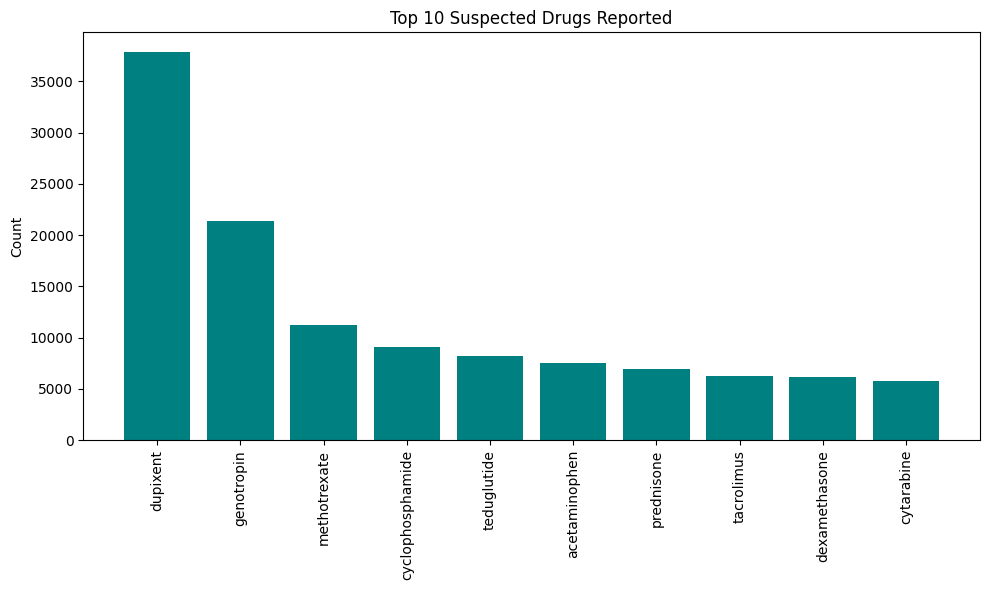

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_drugs['drug_name_cleaned'], top_10_drugs['count'], color='teal')

# Set x-axis labels to vertical
plt.xticks(rotation=90)

# Axis labels and title
plt.title("Top 10 Suspected Drugs Reported")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
#(round(demo_df['sex'].value_counts()/len(demo_df)*100,2)).reset_index()
gender_dis = demo_df['sex'].value_counts().reset_index()
gender_dis

,sex,count
0,M,95514
1,F,88536


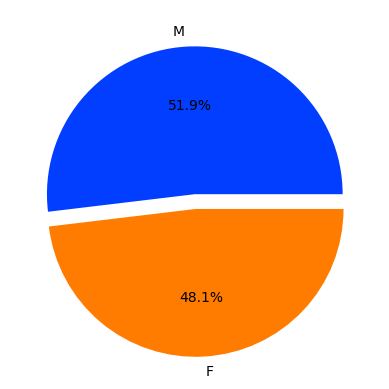

In [12]:
# declaring exploding pie
explode = [0, 0.1]
colors = sns.color_palette('bright')
plt.pie(gender_dis['count'], labels=gender_dis['sex'], colors=colors, explode=explode, autopct='%.1f%%')
plt.show()

In [15]:
age_grps = demo_df['age_bin'].value_counts().reset_index()
age_grps

,age_bin,count
0,Teenager,82832
1,Child,53042
2,Preschooler,20476
3,Toddler,19078
4,Infant,7350
5,Neonate,1272


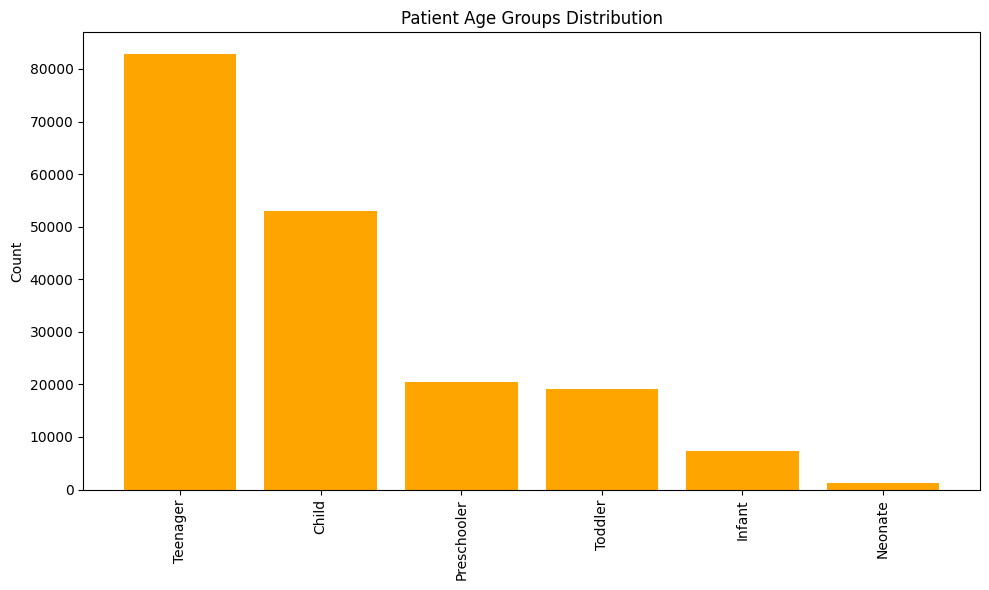

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(age_grps['age_bin'], age_grps['count'], color='orange')

# Set x-axis labels to vertical
plt.xticks(rotation=90)

# Axis labels and title
plt.title("Patient Age Groups Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Top 20 Association Rules by Confidence

In [25]:
import json 
with open('C:/Users/USER/Desktop/FYP/fyp-sandbox-2/Notebooks/Rule_Mining/matched_rules.json', 'r') as f:
    rules = json.load(f)

rules

[{'lhs': ['drug_triamcinolone_acetonide'],
  'rhs': ['demo_origin_us'],
  'confidence': 0.9151515151515152,
  'itemset': ['drug_triamcinolone_acetonide', 'demo_origin_us']},
 {'lhs': ['reaction_skin_haemorrhage'],
  'rhs': ['demo_origin_us'],
  'confidence': 0.9437751004016064,
  'itemset': ['reaction_skin_haemorrhage', 'demo_origin_us']},
 {'lhs': ['reaction_exposure_via_skin_contact'],
  'rhs': ['reaction_accidental_exposure_to_product'],
  'confidence': 0.9171597633136095,
  'itemset': ['reaction_exposure_via_skin_contact',
   'reaction_accidental_exposure_to_product']},
 {'lhs': ['reaction_haemarthrosis'],
  'rhs': ['demo_sex_m'],
  'confidence': 0.9576107899807321,
  'itemset': ['reaction_haemarthrosis', 'demo_sex_m']},
 {'lhs': ['reaction_product_dose_omission_in_error'],
  'rhs': ['demo_origin_us'],
  'confidence': 0.9514925373134329,
  'itemset': ['reaction_product_dose_omission_in_error', 'demo_origin_us']},
 {'lhs': ['drug_nexplanon', 'demo_origin_us'],
  'rhs': ['demo_age_bi

In [26]:
def filter_rules(rules):
    filtered_rules = []
    
    for rule in rules:
        itemset = rule["itemset"]

        # Flags to check required components
        has_drug = any(item.startswith("drug_") for item in itemset)
        has_reaction = any(item.startswith("reaction_") for item in itemset)
        has_sex = any(item.startswith("demo_sex_") for item in itemset)
        has_age_bin = any(item.startswith("demo_age_bin_") for item in itemset)
        has_origin = any(item.startswith("demo_origin_") for item in itemset)

        # At least 5 items and all required parts
        if has_drug and has_reaction and has_sex and has_age_bin and has_origin:
            if len(itemset) >= 5:
                filtered_rules.append({
                    "itemset": itemset,
                    "confidence": rule["confidence"],
                    "lhs": rule["lhs"],
                    "rhs": rule["rhs"]
                })

    return filtered_rules

In [27]:
filtered = filter_rules(rules)
filtered

[{'itemset': ['drug_proactiv_md_deep_cleansing_face_wash',
   'drug_proactiv_md_adapalene_acne_treatment',
   'demo_sex_f',
   'reaction_acne',
   'drug_proactiv_md_daily_oil_control_spf_30',
   'demo_age_bin_teenager',
   'demo_origin_us'],
  'confidence': 0.9532908704883227,
  'lhs': ['drug_proactiv_md_deep_cleansing_face_wash',
   'demo_sex_f',
   'demo_age_bin_teenager',
   'reaction_acne'],
  'rhs': ['drug_proactiv_md_adapalene_acne_treatment',
   'demo_origin_us',
   'drug_proactiv_md_daily_oil_control_spf_30']},
 {'itemset': ['drug_proactiv_md_deep_cleansing_face_wash',
   'drug_proactiv_md_adapalene_acne_treatment',
   'demo_sex_f',
   'reaction_acne',
   'drug_proactiv_md_daily_oil_control_spf_30',
   'demo_age_bin_teenager',
   'demo_origin_us'],
  'confidence': 0.905241935483871,
  'lhs': ['drug_proactiv_md_daily_oil_control_spf_30',
   'demo_sex_f',
   'demo_age_bin_teenager',
   'reaction_acne'],
  'rhs': ['drug_proactiv_md_deep_cleansing_face_wash',
   'drug_proactiv_md_a

In [28]:
filt_rules = pd.DataFrame(filtered)
filt_rules

,itemset,confidence,lhs,rhs
0,"[drug_proactiv_md_deep_cleansing_face_wash, dr...",0.953291,"[drug_proactiv_md_deep_cleansing_face_wash, de...","[drug_proactiv_md_adapalene_acne_treatment, de..."
1,"[drug_proactiv_md_deep_cleansing_face_wash, dr...",0.905242,"[drug_proactiv_md_daily_oil_control_spf_30, de...","[drug_proactiv_md_deep_cleansing_face_wash, dr..."
2,"[drug_proactiv_md_deep_cleansing_face_wash, dr...",0.955319,"[drug_proactiv_md_deep_cleansing_face_wash, dr...","[drug_proactiv_md_daily_oil_control_spf_30, de..."
3,"[drug_proactiv_md_deep_cleansing_face_wash, dr...",0.997778,"[drug_proactiv_md_deep_cleansing_face_wash, de...","[drug_proactiv_md_adapalene_acne_treatment, de..."
4,"[drug_proactiv_md_deep_cleansing_face_wash, dr...",0.953291,"[drug_proactiv_md_deep_cleansing_face_wash, de...","[drug_proactiv_md_adapalene_acne_treatment, dr..."
...,...,...,...,...
102,"[reaction_drug_dose_omission_by_device, demo_a...",1.000000,"[demo_sex_m, demo_origin_us, demo_weight_above...",[demo_age_bin_teenager]
103,"[reaction_drug_dose_omission_by_device, demo_s...",0.974203,"[demo_age_bin_child, demo_sex_f, demo_origin_u...",[drug_genotropin]
104,"[reaction_drug_dose_omission_by_device, drug_g...",0.975591,"[demo_sex_m, demo_age_bin_teenager, demo_origi...",[drug_genotropin]
105,"[reaction_drug_dose_omission_by_device, drug_g...",0.970126,"[demo_sex_m, demo_age_bin_child, demo_origin_u...",[drug_genotropin]


In [36]:
filt_rules.sort_values(by=['confidence'], ascending=False).reset_index().to_csv('sample.csv')

In [38]:
len(filt_rules)

107

In [39]:
filtered_itemsets = []

for ibdx, rule in enumerate(filtered):
    item_set = rule['itemset']
    # print('{\'item_' + str(ibdx) + "': " + str(item_set) + "}")
    iden = f'item_{ibdx+1}'
    filt_item = str(item_set)
    item_temp = {iden:filt_item}
    filtered_itemsets.append(item_temp)

print(filtered_itemsets)

[{'item_1': "['drug_proactiv_md_deep_cleansing_face_wash', 'drug_proactiv_md_adapalene_acne_treatment', 'demo_sex_f', 'reaction_acne', 'drug_proactiv_md_daily_oil_control_spf_30', 'demo_age_bin_teenager', 'demo_origin_us']"}, {'item_2': "['drug_proactiv_md_deep_cleansing_face_wash', 'drug_proactiv_md_adapalene_acne_treatment', 'demo_sex_f', 'reaction_acne', 'drug_proactiv_md_daily_oil_control_spf_30', 'demo_age_bin_teenager', 'demo_origin_us']"}, {'item_3': "['drug_proactiv_md_deep_cleansing_face_wash', 'drug_proactiv_md_adapalene_acne_treatment', 'demo_sex_f', 'reaction_acne', 'drug_proactiv_md_daily_oil_control_spf_30', 'demo_age_bin_teenager', 'demo_origin_us']"}, {'item_4': "['drug_proactiv_md_deep_cleansing_face_wash', 'drug_proactiv_md_adapalene_acne_treatment', 'demo_sex_f', 'reaction_acne', 'drug_proactiv_md_daily_oil_control_spf_30', 'demo_age_bin_teenager', 'demo_origin_us']"}, {'item_5': "['drug_proactiv_md_deep_cleansing_face_wash', 'drug_proactiv_md_adapalene_acne_treatmen

In [40]:
#Getting the unique itemsets
flattened = []
for item in filtered_itemsets:
    for key, value in item.items():
        flattened.append({'id': key, 'outcomes': value})

#Create a DataFrame
filtered_rules_df = pd.DataFrame(flattened)
filtered_rules_df

,id,outcomes
0,item_1,"['drug_proactiv_md_deep_cleansing_face_wash', ..."
1,item_2,"['drug_proactiv_md_deep_cleansing_face_wash', ..."
2,item_3,"['drug_proactiv_md_deep_cleansing_face_wash', ..."
3,item_4,"['drug_proactiv_md_deep_cleansing_face_wash', ..."
4,item_5,"['drug_proactiv_md_deep_cleansing_face_wash', ..."
...,...,...
102,item_103,"['reaction_drug_dose_omission_by_device', 'dem..."
103,item_104,"['reaction_drug_dose_omission_by_device', 'dem..."
104,item_105,"['reaction_drug_dose_omission_by_device', 'dru..."
105,item_106,"['reaction_drug_dose_omission_by_device', 'dru..."


In [41]:
unq_rules = pd.DataFrame(filtered_rules_df['outcomes'].drop_duplicates())
len(unq_rules)

38

In [43]:
import ast
uniq_rules_ls = unq_rules['outcomes'].apply(ast.literal_eval).tolist()
uniq_rules_ls

[['drug_proactiv_md_deep_cleansing_face_wash',
  'drug_proactiv_md_adapalene_acne_treatment',
  'demo_sex_f',
  'reaction_acne',
  'drug_proactiv_md_daily_oil_control_spf_30',
  'demo_age_bin_teenager',
  'demo_origin_us'],
 ['drug_proactiv_md_deep_cleansing_face_wash',
  'demo_sex_f',
  'reaction_acne',
  'drug_proactiv_md_daily_oil_control_spf_30',
  'demo_age_bin_teenager',
  'demo_origin_us'],
 ['drug_proactiv_md_deep_cleansing_face_wash',
  'drug_proactiv_md_adapalene_acne_treatment',
  'demo_sex_f',
  'reaction_acne',
  'demo_age_bin_teenager',
  'demo_origin_us'],
 ['drug_proactiv_md_deep_cleansing_face_wash',
  'demo_sex_f',
  'reaction_acne',
  'demo_age_bin_teenager',
  'demo_origin_us'],
 ['drug_proactiv_md_adapalene_acne_treatment',
  'demo_sex_f',
  'reaction_acne',
  'drug_proactiv_md_daily_oil_control_spf_30',
  'demo_age_bin_teenager',
  'demo_origin_us'],
 ['demo_sex_f',
  'reaction_acne',
  'drug_proactiv_md_daily_oil_control_spf_30',
  'demo_age_bin_teenager',
  'dem

In [44]:
len(uniq_rules_ls)

38

In [45]:
import networkx as nx
G = nx.Graph()

C:\Users\USER\AppData\Local\Temp\ipykernel_4504\1368617503.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


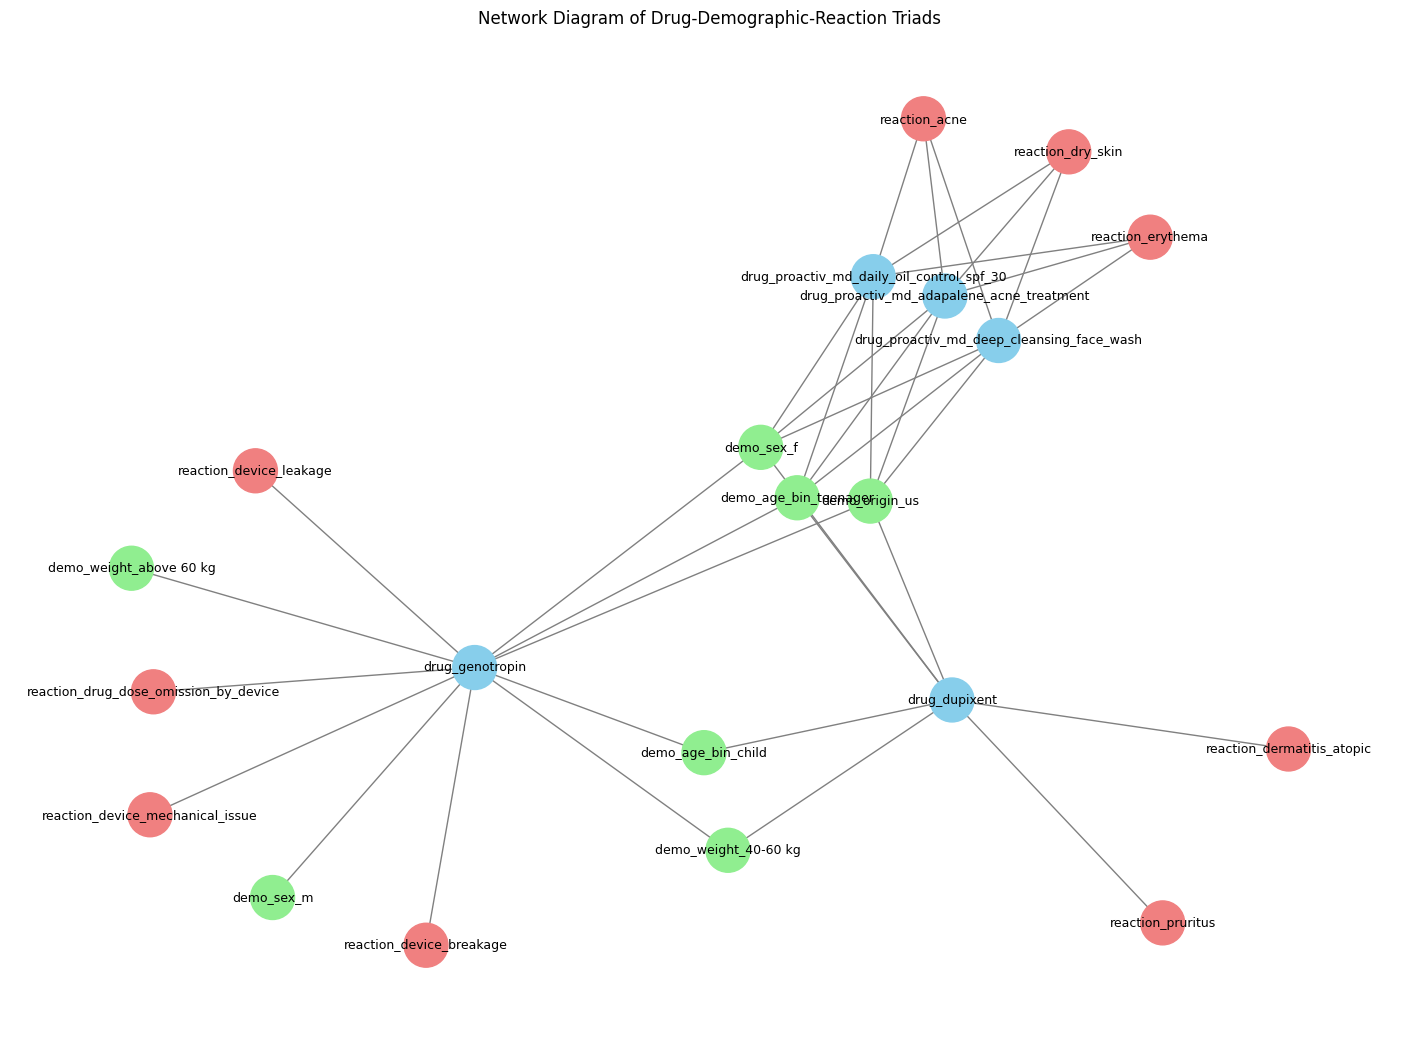

In [46]:
#creating the graph
for rule in uniq_rules_ls:
    drugs = [item for item in rule if item.startswith("drug_")]
    demographics = [item for item in rule if item.startswith("demo_")]
    reactions = [item for item in rule if item.startswith("reaction_")]

    for drug in drugs:
        G.add_node(drug, type="drug")
        for demo in demographics:
            G.add_node(demo, type="demographic")
            G.add_edge(drug, demo)
        for rxn in reactions:
            G.add_node(rxn, type="reaction")
            G.add_edge(drug, rxn)

# Define colors
color_map = []
for node, data in G.nodes(data=True):
    if data['type'] == 'drug':
        color_map.append('skyblue')
    elif data['type'] == 'reaction':
        color_map.append('lightcoral')
    elif data['type'] == 'demographic':
        color_map.append('lightgreen')
    else:
        color_map.append('grey')

# Draw
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=1000, font_size=9, edge_color='gray')
plt.title("Network Diagram of Drug-Demographic-Reaction Triads")
plt.tight_layout()
plt.show()